# Configuração inicial

In [1]:
# Instalando bibliotecas
!pip install -q spectral

     |████████████████████████████████| 212 kB 7.3 MB/s 


In [2]:
# Importando bibliotecas
import numpy as np
import tifffile as tif
from spectral import imshow
import matplotlib
from math import sqrt

In [3]:
# Definindo pardrão de saída das imagens
matplotlib.rcParams['figure.figsize'] = (15,10)

# RGB para IHS

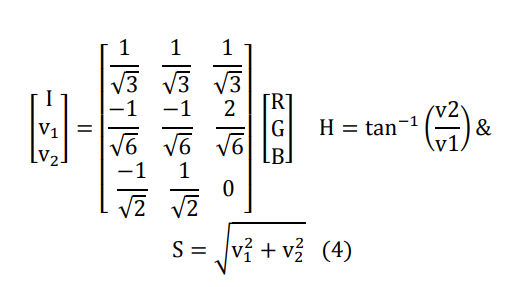

In [4]:
# Leitura da imagem
img = tif.imread('/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif')

In [5]:
# Separando apenas as bandas R, G e B
img_RGB= np.dstack([img[:,:,2],img[:,:,1],img[:,:,0]])

In [6]:
# Transformando de 3 para 2 dimensões
matriz = img_RGB.reshape(img_RGB.shape[0]*img_RGB.shape[1], img_RGB.shape[2])

In [7]:
# Matriz de transformação
M = np.array(([1/sqrt(3),1/sqrt(3),1/sqrt(3)],[-1/sqrt(6),-1/sqrt(6),2/sqrt(6)],[-1/sqrt(2),1/sqrt(2),0]))

In [8]:
# Extraindo componentes I, V1 e V2
ivv = np.zeros(matriz.shape)

for i in range(len(matriz)):
  produto = M.dot(matriz[i,:])
  ivv[i,:] = produto
 

In [9]:
# Componentes I, v1 e v2
I = ivv[:,0].reshape(img_RGB[:,:,0].shape)
v1 = ivv[:,1]
v2 = ivv[:,2]

In [10]:
# Componente H
H = np.zeros((ivv[:,0].size))
for i in range(len(matriz)):
  h = np.arctan(v2[i]/v1[i])
  H[i] = h
H = H.reshape(img_RGB[:,:,0].shape)
H = np.nan_to_num(H)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [11]:
# Componente S
S = np.zeros((ivv[:,0].size))
for i in range(len(matriz)):
  s = sqrt((v1[i])**2 + (v2[i])**2)
  S[i] = s
S = S.reshape(img_RGB[:,:,0].shape)

In [12]:
# Empilhando as componentes
ihs = np.dstack([I,H,S])

ImageView object:
  Display bands       :  (0, 1, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [65.81793068761735, 143.1828667590272]
    G: [-1.5264139320413512, 1.488503983553949]
    B: [5.099019513592785, 22.464787260658994]

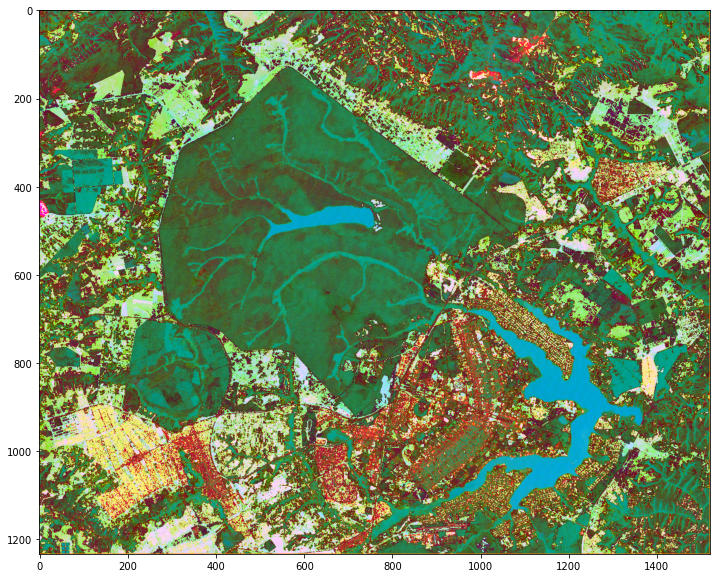

In [16]:
# Visualizando
imshow(ihs, bands=(0,1,2), stretch=(0.02,0.98))

# IHS para RBG

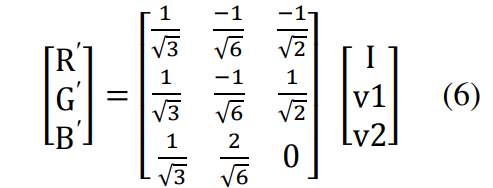

In [ ]:
# Matriz de transformação
M2 = np.array(([1/sqrt(3),-1/sqrt(6),-1/sqrt(2)],[1/sqrt(3),-1/sqrt(6),1/sqrt(2)],[1/sqrt(3),2/sqrt(6),0]))

In [ ]:
# Extraindo componentes
ihs_rgb = np.zeros(matriz.shape)

for i in range(len(matriz)):
  prod = M2.dot(ivv[i,:])
  ihs_rgb[i,:] = prod

In [ ]:
# Empilhando componentes
ihs_rgb= ihs_rgb.reshape(ihs.shape)

ImageView object:
  Display bands       :  (0, 1, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [27.0, 99.00000000000003]
    G: [36.000000000000014, 75.00000000000001]
    B: [50.00000000000001, 78.00000000000003]

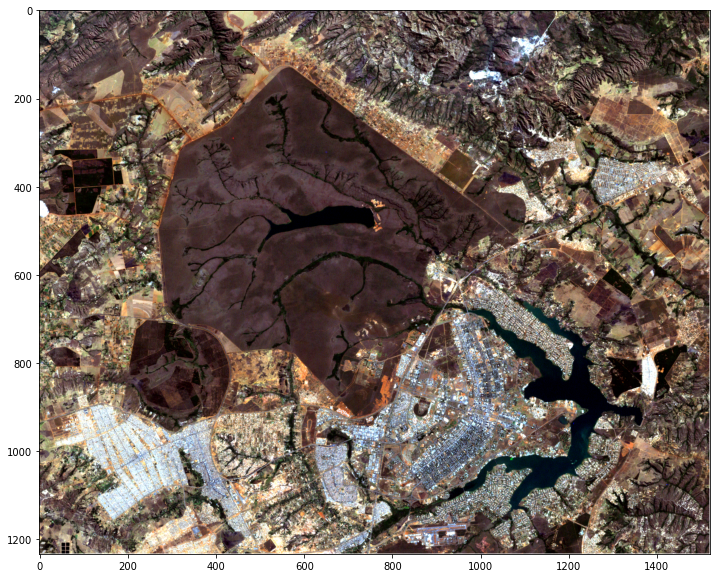

In [ ]:
# Visualizando
imshow(ihs_rgb, bands=(0,1,2), stretch=(0.02,0.98))